In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [2]:
#punto 1
df = pd.read_csv("data.csv")
df.head()

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [29]:
#punto 2
df["mese_numerico"] = range(len(df))
df.head(30)

,date,passengers,mese_numerico
0,1949-01,112.0,0
1,1949-02,118.0,1
2,1949-03,132.0,2
3,1949-04,129.0,3
4,1949-05,121.0,4
5,1949-06,135.0,5
6,1949-07,148.0,6
7,1949-08,148.0,7
8,1949-09,136.0,8
9,1949-10,119.0,9


In [34]:
df = df.dropna()

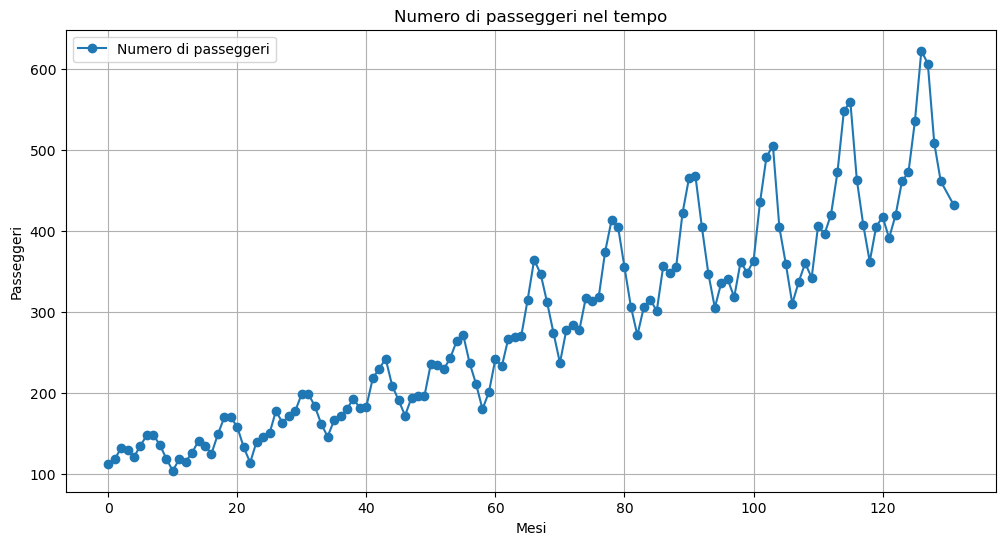

In [36]:
X = df["mese_numerico"].values #variabile indipendente
y = df["passengers"].values #variabile dipendente
plt.figure(figsize=(12, 6))
plt.plot(X, y, marker='o', linestyle='-', label='Numero di passeggeri')
plt.title('Numero di passeggeri nel tempo')
plt.xlabel('Mesi')
plt.ylabel('Passeggeri')
plt.legend()
plt.grid(True)
plt.show()

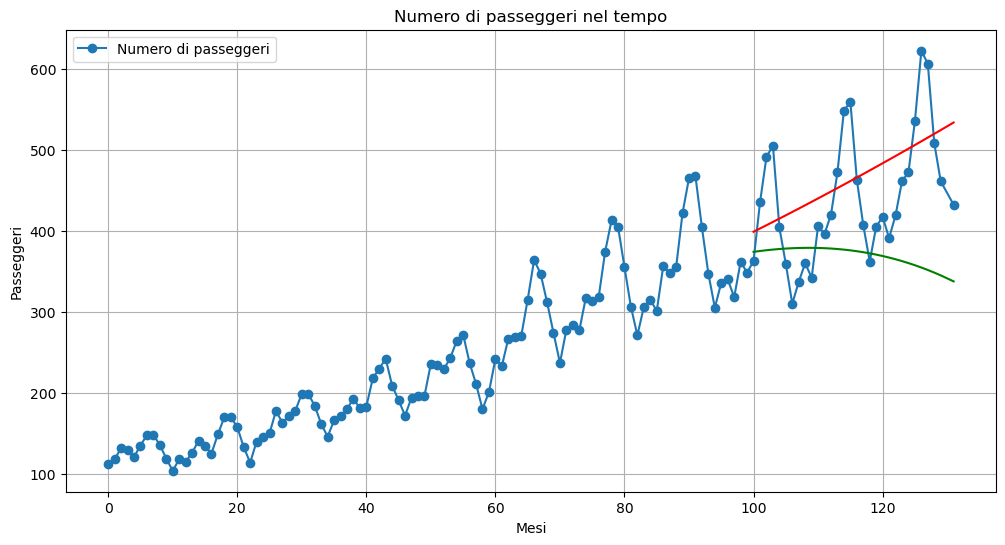

In [37]:
#punto 3
#prima divido i dati
X = X.reshape(-1, 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=100, shuffle=False)

poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly2.fit(Xtrain, ytrain)
ypred2 = poly2.predict(Xtest)

poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly3.fit(Xtrain, ytrain)
ypred3 = poly3.predict(Xtest)

plt.figure(figsize=(12, 6))
plt.plot(X, y, marker='o', linestyle='-', label='Numero di passeggeri')
plt.plot(Xtest, ypred2, color="red")
plt.plot(Xtest, ypred3, color="green")
plt.title('Numero di passeggeri nel tempo')
plt.xlabel('Mesi')
plt.ylabel('Passeggeri')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#punto 4
from sklearn.metrics import root_mean_squared_error
rmse2 = root_mean_squared_error(ytest, ypred2)
rmse3 = root_mean_squared_error(ytest, ypred3)
print(rmse2, rmse3)

71.52908451099653 109.42808742576594


In [48]:
#per grafici con linea singola px per piu linee questo
import plotly.graph_objects as go

#grafico iniziale
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["mese_numerico"], y=df["passengers"], mode='lines+markers', name='Passeggeri reali'))

#agigungo grado 2
fig.add_trace(go.Scatter(x=Xtest.flatten(), y=ypred2, mode='lines', name='Polinomio grado 2'))

#aggiungo grado 3
fig.add_trace(go.Scatter(x=Xtest.flatten(), y=ypred3, mode='lines', name='Polinomio grado 3'))

# Layout
fig.update_layout(
    title='Numero di passeggeri nel tempo',
    xaxis_title='Mesi',
    yaxis_title='Passeggeri',
)

fig.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [55]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

X = np.linspace(-3, 3, 100)
print(X.shape)
y = X**3 - X + np.random.normal(0, 3, size=100) #aggiungo rumore

X = X.reshape(-1, 1)  #reshape per sklearn (come prima)

app = dash.Dash(__name__)
app.title = "Regressione Polinomiale Interattiva"

app.layout = html.Div([
    html.H1("Regressione Polinomiale Interattiva"),

    dcc.Slider(
        id='grado-slider',
        min=1,
        max=10,
        step=1,
        value=3,
        marks={i: str(i) for i in range(1, 11)},
    ),

    dcc.Graph(id='grafico-regressione')
])


@app.callback(
    Output('grafico-regressione', 'figure'),
    Input('grado-slider', 'value')
)
def aggiorna_grafico(grado):
    #devo fare la regressione come prima

    poly = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    poly.fit(X, y)
    ypred = poly.predict(X)

    #linee per il grafico
    trace_dati = go.Scatter(x=X.flatten(), y=y, mode='markers', name='Dati originali')
    trace_fit = go.Scatter(x=X.flatten(), y=ypred, mode='lines', name=f'Fit grado {grado}')

    return go.Figure(data=[trace_dati, trace_fit])


if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


(100,)
